# 2.4 **代表的な確率分布**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### ベルヌーイ分布


In [2]:
d = stats.bernoulli(0.6)

In [3]:
X = d.rvs(100)
X

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [4]:
sum(X)

61

In [5]:
print(d.pmf(0), d.pmf(1))

0.4 0.6


<BarContainer object of 2 artists>

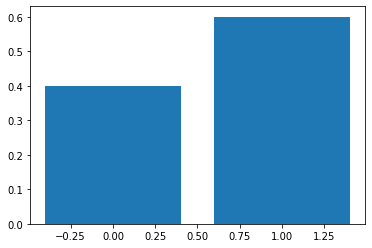

In [6]:
# plt.bar([0, 1], [d.pmf(0), d.pmf(1)])でも可
plt.bar([0, 1], d.pmf([0, 1]))

In [7]:
print(d.mean(), d.var())

0.6 0.24


#### カテゴリ分布


In [8]:
# N=1とした多項分布としてカテゴリ分布を定義（π=[0.1, 0.2, 0.3, 0.4]）
cat_dist = stats.multinomial(1, [0.1, 0.2, 0.3, 0.4])

# K=4
K = len(cat_dist.p)

# 定義したカテゴリ分布から100個のサンプルを生成
X_onehot = cat_dist.rvs(100)
X_onehot

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1,

In [9]:
# one-hot表現からカテゴリに変換する
X = [np.argmax(x) for x in X_onehot]
X

[1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 0,
 3,
 1,
 2,
 0,
 2,
 3,
 0,
 2,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 0,
 2,
 1,
 2,
 3,
 2,
 3,
 3,
 1]

(array([ 9., 21., 27., 43.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

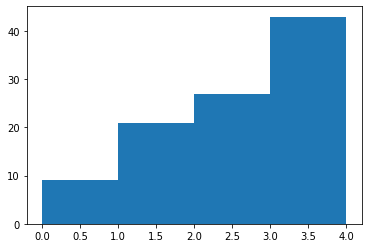

In [10]:
# ヒストグラムを描く（Kに応じてbinsの値を設定）
plt.hist(X, bins=range(K+1))

In [11]:
X_tmp = np.identity(K)[range(K)]
X_tmp

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<BarContainer object of 4 artists>

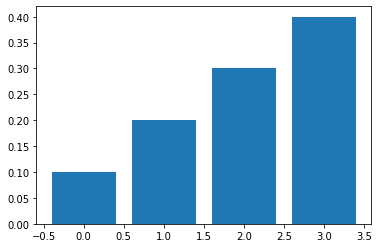

In [12]:
plt.bar(range(K), cat_dist.pmf(X_tmp))

#### 二項分布（binomial distribution）


In [13]:
# 二項分布を定義
N = 8
theta = 0.2
bin_dist = stats.binom(N, theta)

# 定義された二項分布からサンプルを100個生成
X = bin_dist.rvs(100)
X

array([2, 3, 2, 2, 2, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 4, 1, 0, 1, 2, 1, 1,
       1, 3, 4, 2, 2, 1, 4, 1, 2, 1, 1, 2, 1, 0, 2, 2, 4, 4, 4, 2, 3, 3,
       2, 1, 1, 0, 3, 2, 1, 1, 5, 0, 3, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 3, 4, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1])

average = 1.57
variance = 1.3451


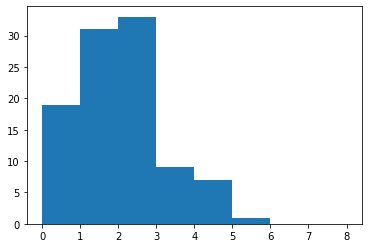

In [14]:
# ヒストグラムを作成
plt.hist(X, range(N+1))

# サンプルから平均を計算
print('average = ' + str(np.mean(X)))

# サンプルから分散を計算
print('variance = ' + str(np.std(X)**2))

<BarContainer object of 9 artists>

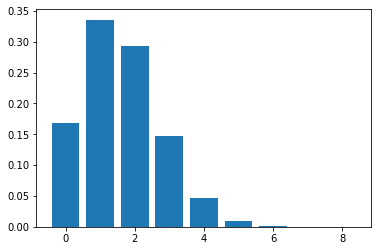

In [15]:
# 確率質量関数の描画
ar = np.arange(0,N+1)
plt.bar(ar, bin_dist.pmf(ar))

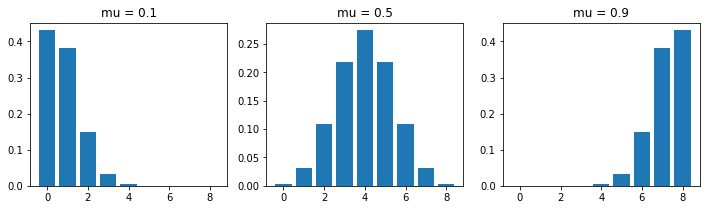

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
params = [0.1, 0.5, 0.9]
for i, param in enumerate(params):
  bin_dist = stats.binom(N, param)  
  axes[i].bar(ar, bin_dist.pmf(ar))
  axes[i].set_title('mu = ' + str(param))

#### ポアソン分布（Poisson distribution）

In [17]:
# ポアソン分布を定義
poi_dist = stats.poisson(3.0)

# 定義されたポアソン分布からサンプルを100個生成
X = poi_dist.rvs(100)
X

array([2, 6, 0, 5, 3, 3, 4, 4, 3, 3, 2, 1, 4, 4, 2, 2, 6, 4, 1, 4, 3, 1,
       0, 4, 3, 4, 4, 3, 5, 0, 1, 3, 3, 5, 3, 3, 4, 1, 2, 6, 1, 3, 1, 6,
       4, 4, 4, 2, 3, 4, 2, 6, 5, 1, 5, 1, 2, 1, 2, 4, 4, 2, 1, 0, 2, 4,
       2, 0, 4, 1, 3, 3, 2, 1, 2, 0, 5, 3, 2, 2, 4, 2, 1, 6, 3, 2, 0, 5,
       3, 4, 8, 2, 2, 4, 3, 3, 1, 3, 4, 5])

average = 2.9
variance = 2.75


(array([ 7., 15., 20., 21., 22.,  8.,  6.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

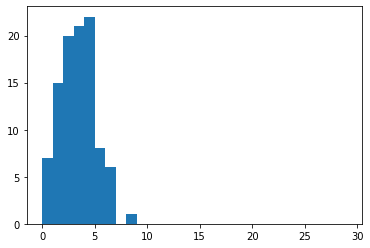

In [18]:
# サンプルから平均を計算
print('average = ' + str(np.mean(X)))

# サンプルから分散を計算
print('variance = ' + str(np.std(X)**2))

# ヒストグラムを描く
plt.hist(X, range(30))

<BarContainer object of 30 artists>

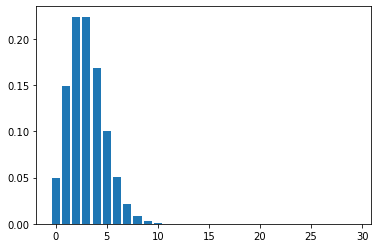

In [19]:
# 確率質量関数のプロット（適当に30で打ち切る）
ar = np.arange(0,30)
plt.bar(ar, poi_dist.pmf(ar))

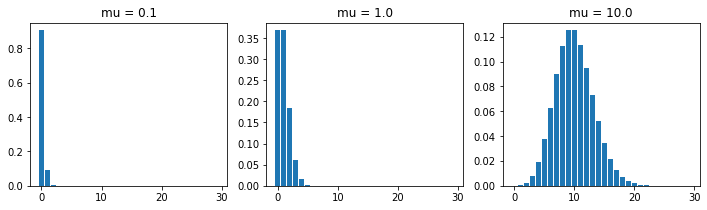

In [20]:
# ポアソン分布のパラメータを変えてみて，確率質量関数の変化を見てみる
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
params = [0.1, 1.0, 10.0]
for i, param in enumerate(params):
  poi_dist = stats.poisson(param)
  axes[i].bar(np.arange(0,30), poi_dist.pmf(np.arange(0,30)))
  axes[i].set_title('mu = ' + str(param))

#### 一様分布（uniform distribution）


In [21]:
uni_dist = stats.uniform(2, 5-2)

# 定義した一様分布から100個のサンプルを生成
X = uni_dist.rvs(100)
X

array([4.34455846, 3.83257645, 2.48147659, 2.71531524, 2.65845152,
       2.69340677, 2.2195604 , 3.78456773, 2.46294905, 2.27507176,
       4.9583356 , 2.32008692, 3.35565083, 4.08087198, 2.76574365,
       4.97312546, 4.13164588, 4.97009645, 2.89850556, 4.23873433,
       3.43839864, 3.70050669, 2.44363466, 3.15528433, 4.58241957,
       2.01298939, 3.36923892, 4.27671513, 2.02174194, 3.16829641,
       3.77174077, 3.51396715, 2.52307328, 3.06595578, 4.00203272,
       2.90918669, 2.84732043, 2.17472961, 3.98809746, 2.32492952,
       4.45867219, 3.44049376, 4.04736341, 4.75368719, 2.81455153,
       4.88948928, 4.83572617, 4.87086876, 3.22292688, 4.10957388,
       2.64976629, 2.4733697 , 2.12711294, 4.23524359, 4.22265254,
       4.87036772, 4.45762185, 2.77125307, 4.5293538 , 3.02081193,
       2.82669745, 4.56555938, 2.05949163, 4.4613897 , 4.23962676,
       2.24036864, 4.37260485, 3.53736516, 2.54532879, 2.66911319,
       3.84543211, 4.35569945, 2.76605894, 4.21816902, 2.46268

(array([12., 11., 15.,  7.,  6.,  8.,  9., 14.,  9.,  9.]),
 array([2.01298939, 2.309003  , 2.60501661, 2.90103021, 3.19704382,
        3.49305743, 3.78907103, 4.08508464, 4.38109825, 4.67711186,
        4.97312546]),
 <a list of 10 Patch objects>)

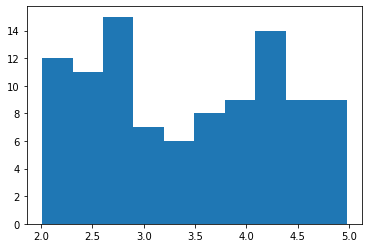

In [22]:
plt.hist(X, bins=10)

#### 1次元ガウス分布（正規分布）

(array([  2.,   5.,  40., 125., 213., 270., 203.,  97.,  37.,   8.]),
 array([-3.72527896, -3.03055228, -2.3358256 , -1.64109893, -0.94637225,
        -0.25164557,  0.4430811 ,  1.13780778,  1.83253446,  2.52726113,
         3.22198781]),
 <a list of 10 Patch objects>)

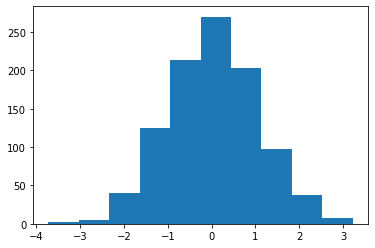

In [24]:
# ガウス分布を定義
normal_dist = stats.norm(0.0, 1.0)

# 定義したガウス分布から1000個のサンプルを生成
X = normal_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

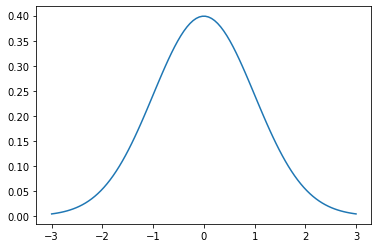

In [25]:
ls = np.linspace(-3, 3, 100)
plt.plot(ls, normal_dist.pdf(ls))

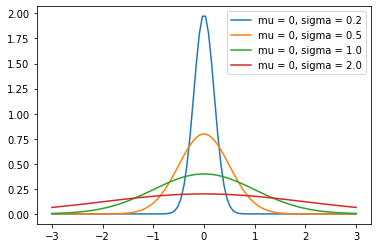

In [26]:
# 標準偏差を変えてガウス分布をプロットしてみる
mu = 0
sigma_list = [0.2, 0.5, 1.0, 2.0]
for sigma in sigma_list:
  normal_dist = stats.norm(mu, sigma)
  plt.plot(ls, normal_dist.pdf(ls), 
           label='mu = ' + str(mu) + ', sigma = ' + str(sigma))
plt.legend()

#### **多次元ガウス分布（多変量正規分布）**$\dagger$ 


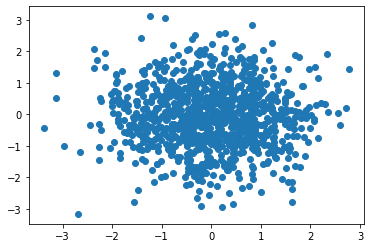

In [27]:
# 多次元ガウス分布を定義
mu = [0, 0]
Sigma = [[1.0, 0.0],
         [0.0, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

# 定義したガウス分布から1000個のサンプルを生成（1000x2の行列）
X = mvn_dist.rvs(1000)

# 散布図を描く
plt.scatter(X[:,0], X[:,1])

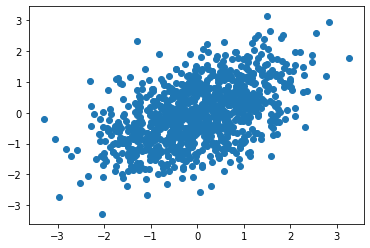

In [28]:
# 多次元ガウス分布を定義
mu = [0, 0]
Sigma = [[1.0, 0.5],
         [0.5, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

# 定義したガウス分布から1000個のサンプルを生成（1000x2の行列）
X = mvn_dist.rvs(1000)

# 散布図を描く
plt.scatter(X[:,0], X[:,1])

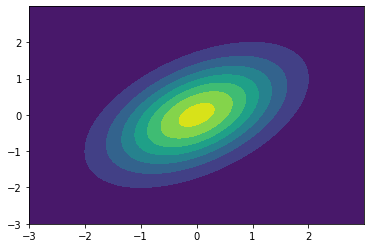

In [29]:
x1, x2 = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x1, x2))
plt.contourf(x1, x2, mvn_dist.pdf(pos))

#### ベータ分布

(array([381.,  36.,  20.,  25.,  19.,  14.,  24.,  24.,  32., 425.]),
 array([2.58719415e-39, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

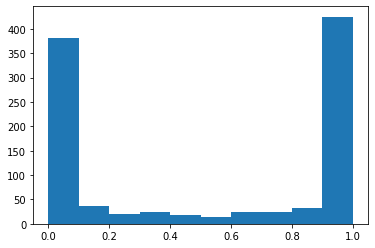

In [30]:
# ベータ分布を定義
beta_dist = stats.beta(0.1, 0.1)

# 定義したベータ分布から1000個のサンプルを生成
X = beta_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

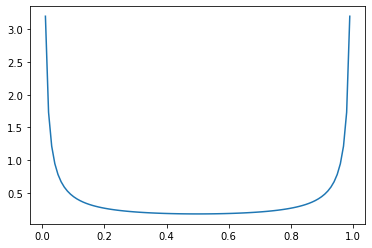

In [31]:
# 確率密度関数を描画する
ls = np.linspace(0, 1, 100)
plt.plot(ls, beta_dist.pdf(ls))

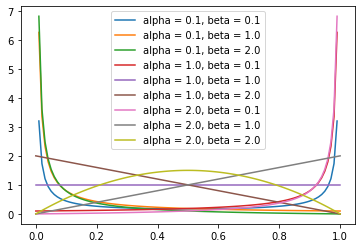

In [32]:
# ベータ分布の定義域は(0, 1)
ls = np.linspace(0,1,100)

# 各パラメータを変えてベータ分布をプロットしてみる
alpha_list = [0.1, 1.0, 2.0]
beta_list = [0.1, 1.0, 2.0]
for alpha in alpha_list:
  for beta in beta_list:
    beta_dist = stats.beta(alpha, beta)
    plt.plot(ls, beta_dist.pdf(ls), 
             label='alpha = ' + str(alpha) + ', beta = ' + str(beta))
plt.legend()

#### ディリクレ分布

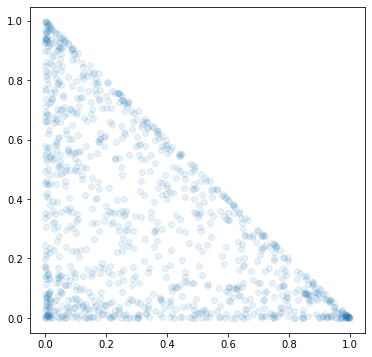

In [33]:
# ディリクレ分布を定義
dir_dist = stats.dirichlet([0.5, 0.5, 0.5])

# 定義したディリクレ分布から1000個のサンプルを生成
X = dir_dist.rvs(1000)

# 散布図を描く
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], alpha=0.1)

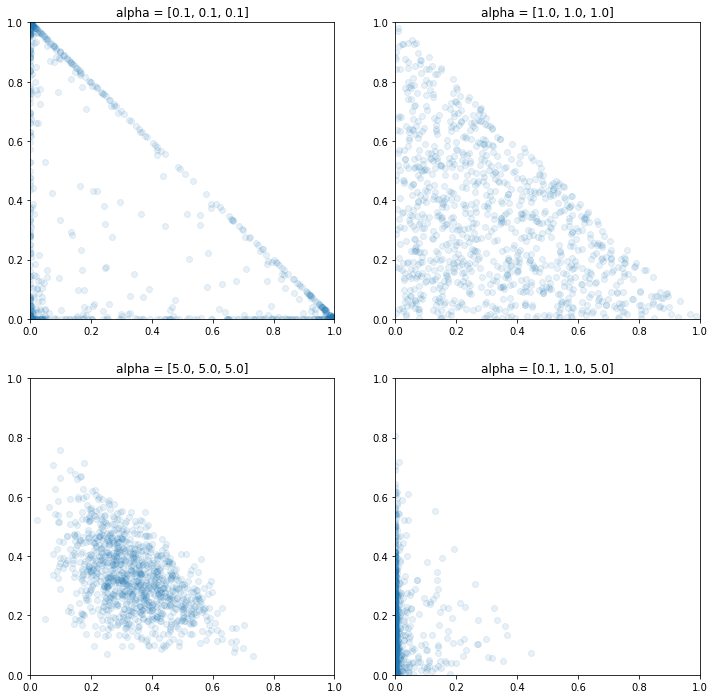

In [34]:
# αを変えてディリクレ分布をプロットしてみる
alpha_list = [[0.1, 0.1, 0.1], [1.0, 1.0, 1.0], 
              [5.0, 5.0, 5.0], [0.1, 1.0, 5.0]]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for (i, ax) in enumerate(axes.ravel()): 
    alpha = alpha_list[i]
    dir_dist = stats.dirichlet(alpha)
    X = dir_dist.rvs(1000)
    ax.scatter(X[:,0], X[:,1], alpha=0.1)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title('alpha = ' + str(alpha))

#### ガンマ分布

(array([474., 213., 144.,  77.,  43.,  22.,  12.,   6.,   4.,   5.]),
 array([6.98385363e-04, 5.89330067e-01, 1.17796175e+00, 1.76659343e+00,
        2.35522511e+00, 2.94385680e+00, 3.53248848e+00, 4.12112016e+00,
        4.70975184e+00, 5.29838352e+00, 5.88701520e+00]),
 <a list of 10 Patch objects>)

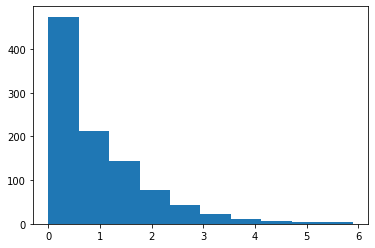

In [35]:
# ガンマ分布を定義
alpha = 1.0
theta = 1.0
gamma_dist = stats.gamma(a=alpha, scale=theta)

# 定義したガンマ分布から1000個のサンプルを生成
X = gamma_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

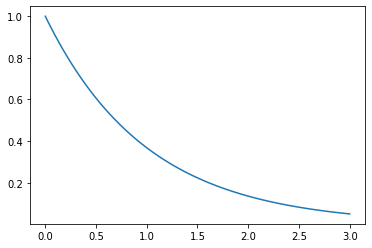

In [36]:
ls = np.linspace(0, 3, 100)
plt.plot(ls, gamma_dist.pdf(ls))

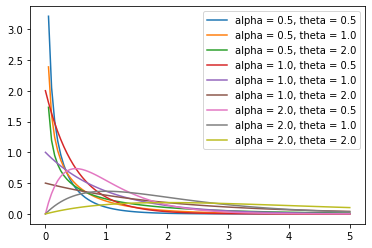

In [37]:
# ガンマ分布の定義域（5で打ち切り）
ls = np.linspace(0,5,100)

# パラメータを変えてベータ分布をプロット
alpha_list = [0.5, 1.0, 2.0]
theta_list = [0.5, 1.0, 2.0]
for alpha in alpha_list:
  for theta in theta_list:
    gamma_dist = stats.gamma(a=alpha, scale=theta)
    plt.plot(ls, gamma_dist.pdf(ls),
             label='alpha = ' + str(alpha) + ', theta = ' + str(theta))
plt.legend()

# 2.5 **確率モデルの設計**

#### 混合モデル

In [38]:
# パラメータの設定
mu = 0.3
d1 = stats.norm(1.0, 0.5)
d2 = stats.norm(-1.0, 1.0)

# 変数の初期化
N = 10000
Z = np.zeros(N)
X = np.zeros(N)

# 各データをサンプル
for i in range(N):
  Z[i] = stats.bernoulli(mu).rvs()
  if Z[i] == 0:
    X[i] = d1.rvs()
  else:
    X[i] = d2.rvs()

(array([   9.,   48.,  219.,  573.,  912.,  903., 2583., 3786.,  936.,
          31.]),
 array([-4.60947027, -3.83786316, -3.06625605, -2.29464894, -1.52304183,
        -0.75143472,  0.02017239,  0.7917795 ,  1.56338662,  2.33499373,
         3.10660084]),
 <a list of 10 Patch objects>)

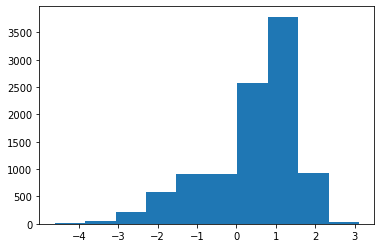

In [39]:
plt.hist(X, bins=10)

In [40]:
def mixture_pdf(mu, d1, d2, x):
  return (1.0 - mu)*d1.pdf(x) + mu*d2.pdf(x)

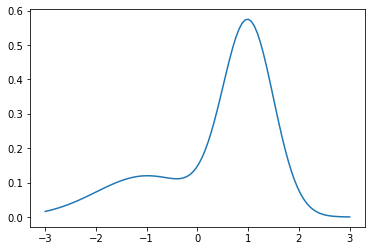

In [41]:
# 確率密度関数を描画する
ls = np.linspace(-3, 3, 100)
plt.plot(ls, mixture_pdf(mu, d1, d2, ls))

#### 回帰モデル

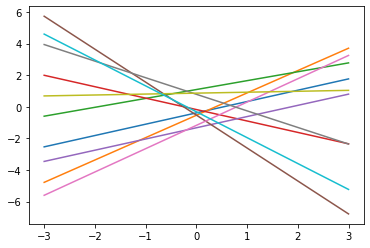

In [42]:
N = 10

ls = np.linspace(-3, 3, 100)
plt.figure()
for i in range(N):
  a = stats.norm(0,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, a*ls+b)

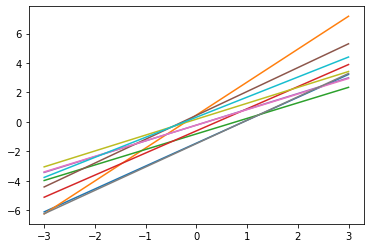

In [43]:
plt.figure()
for i in range(N):
  a = stats.gamma(1,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, a*ls+b)

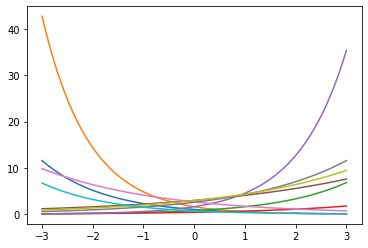

In [44]:
plt.figure()
for i in range(N):
  a = stats.norm(0,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, np.exp(a*ls+b))